In [1]:
from HardDisks import HardDisks
import numpy as np
import matplotlib.pyplot as plt

## Testing Model

In [ ]:
# Parameters
N = 16           # Number of disks
q = 1.0          # Step size
L = 10.0         # Box size
sigma = 0.5      # Disk radius
steps = 1000     # Number of Metropolis steps

# Create the HardDisks system
system = HardDisks(N, q, L, sigma, initial_conf='rectangular')

# Plot initial configuration
system.plot(title="Initial Configuration")

# Simulate the system
system.simulate(steps)

# Plot final configuration
system.plot(title="Final Configuration after Metropolis")


In [ ]:
fig, ax = plt.subplots(1,1, figsize=(6,6))

# N should be a perfect square to start from rectangular configuration
N = np.asarray([4,9, 16, 25, 36, 49, 64, 81]) 
q = np.linspace(0.2, 10, 20)
steps = 1000

acceptance_rate = np.zeros((len(N), len(q)))
eta = np.zeros(len(N))
X, Y = np.meshgrid(eta, q)
for i in range(len(N)):
    for j in range(len(q)):
        system = HardDisks(X[i], Y[j], 100, 2, initial_conf='rectangular')
        rate = system.get_avg_acceptance(steps)
        Z[i,j] = rate
        eta[i] = system.get_packing()

In [ ]:
X, Y = np.meshgrid(eta, q)
Z = acceptance_rate.reshape(X.shape)
fig, ax = plt.subplots(1,1, figsize=(7, 7))
ax.set_title('Contour plot of Acceptance Rate')
# ax.contourf(X, Y, Z)

contourf = ax.contourf(X, Y, Z, cmap='viridis')

ax.set_xlabel(r'Packing fraction $\eta$', fontsize=13)
ax.set_ylabel(r'Characteristic Length $q$', fontsize=13)
contour = ax.contour(X, Y, Z, colors='black', linewidths=0.8)
# ax.clabel(contour, inline=True, fontsize=10)  # Add labels to contour lines
cbar = fig.colorbar(contourf, ax=ax)
cbar.set_label('Acceptance Rate', fontsize=13)

## Plotting density of acceptance rates

In [ ]:
# Parameters
N = np.asarray([4, 9, 16, 25, 36, 49, 64, 81])  # Perfect squares
q = np.linspace(0.2, 10, 20)  # Range of q values
steps = 1000  # Number of steps

# Initialize variables
acceptance_rate = np.zeros((len(N), len(q)))  # Acceptance rate grid
eta = np.zeros(len(N))  # Packing fractions
Z = np.zeros((len(N), len(q)))  # Grid for Z values (acceptance rates)

# Loop over N and q to calculate acceptance rate
for i in range(len(N)):
    for j in range(len(q)):
        # Create a system (assuming HardDisks class is defined elsewhere)
        system = HardDisks(N[i], q[j], 100, 2, initial_conf='rectangular')
        
        # Compute acceptance rate and packing fraction
        rate = system.get_avg_acceptance(steps)
        acceptance_rate[i, j] = rate  # Save acceptance rate
        Z[i, j] = rate  # Assign to Z grid
        eta[i] = system.get_packing()  # Save packing fraction

# Create the meshgrid after populating eta
X, Y = np.meshgrid(eta, q)

# Print shapes for debugging
print(f"X.shape: {X.shape}, Y.shape: {Y.shape}, Z.shape: {Z.shape}")


In [ ]:
fig, ax = plt.subplots(1,1, figsize=(7, 7))
ax.set_title('Contour plot of Acceptance Rate')
# ax.contourf(X, Y, Z)

contourf = ax.contourf(X, Y, Z, cmap='viridis')

ax.set_xlabel(r'Packing fraction $\eta$', fontsize=13)
ax.set_ylabel(r'Characteristic Length $q$', fontsize=13)
contour = ax.contour(X, Y, Z, colors='black', linewidths=0.8)
# ax.clabel(contour, inline=True, fontsize=10)  # Add labels to contour lines
cbar = fig.colorbar(contourf, ax=ax)
cbar.set_label('Acceptance Rate', fontsize=13)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = np.asarray([4, 16, 25, 49, 81, 100, 144, 169, 225, 256])  # Perfect squares
q = np.linspace(0.2, 20, 25)  # Range of q values
steps = 1000  # Number of steps

# Initialize variables
acceptance_rate = np.zeros((len(N), len(q)))  # Acceptance rate grid
eta = np.zeros(len(N))  # Packing fractions
Z = np.zeros((len(N), len(q)))  # Grid for Z values (acceptance rates)

# Loop over N and q to calculate acceptance rate
for i in range(len(N)):
    for j in range(len(q)):
        # Create a system 
        system = HardDisks(N[i], q[j], 100, 2, initial_conf='rectangular')
        
        # Compute acceptance rate and packing fraction
        rate = system.get_avg_acceptance(steps)
        acceptance_rate[i, j] = rate  # Save acceptance rate
        Z[i, j] = rate  # Assign to Z grid
        eta[i] = system.get_packing()  # Save packing fraction
        print(f"N: {N[i]}, q: {q[j]}, rate: {rate}, eta: {eta[i]}")

# Create the meshgrid with eta (rows) and q (columns)
X, Y = np.meshgrid(eta, q, indexing='ij')  # Ensure consistent indexing with Z

# Debugging shapes
print(f"X.shape: {X.shape}, Y.shape: {Y.shape}, Z.shape: {Z.shape}")

In [ ]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.set_title('Contour plot of Acceptance Rate')

# Filled contours
contourf = ax.contourf(X, Y, Z, cmap='viridis')

# Contour lines
contour = ax.contour(X, Y, Z, colors='black', linewidths=0.8)
ax.clabel(contour, inline=True, fontsize=10)

# Colorbar
cbar = fig.colorbar(contourf, ax=ax)
cbar.set_label('Acceptance Rate', fontsize=13)

# Axes labels
ax.set_xlabel(r'Packing fraction $\eta$', fontsize=13)
ax.set_ylabel(r'Characteristic Length $q$', fontsize=13)
fig.savefig('Plots/ex12_acceptance_rate.png', dpi=300)
plt.show()

## Pair correlation function

Move rejected: Overlap detected. Particle 31 with 34, Distance: 3.847
Move rejected: Overlap detected. Particle 20 with 25, Distance: 3.732
Move rejected: Overlap detected. Particle 32 with 12, Distance: 3.624
Move rejected: Overlap detected. Particle 8 with 15, Distance: 2.132
Move rejected: Overlap detected. Particle 32 with 12, Distance: 1.196
Move rejected: Overlap detected. Particle 3 with 17, Distance: 2.350
Move rejected: Overlap detected. Particle 6 with 35, Distance: 2.210
Move rejected: Overlap detected. Particle 32 with 12, Distance: 1.859
Move rejected: Overlap detected. Particle 3 with 17, Distance: 4.389
Move rejected: Overlap detected. Particle 35 with 6, Distance: 3.753
Move rejected: Overlap detected. Particle 34 with 31, Distance: 3.740
Move rejected: Overlap detected. Particle 28 with 7, Distance: 4.985
Move rejected: Overlap detected. Particle 17 with 3, Distance: 1.929
Move rejected: Overlap detected. Particle 8 with 15, Distance: 4.943
Move rejected: Overlap detec

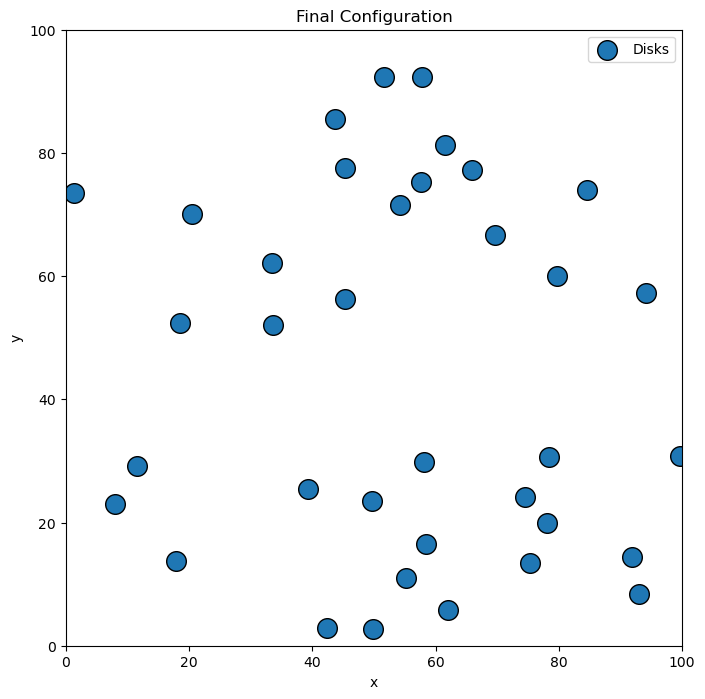

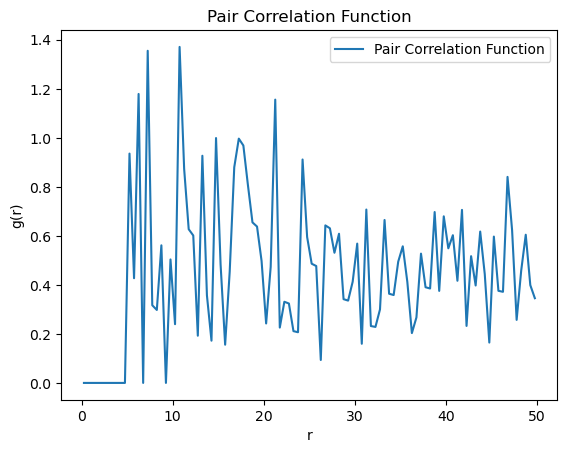

In [3]:
# Parameters
N = 36           # Number of disks
q = 4.0          # Step size
L = 100         # Box size
sigma = 5      # Disk radius
steps = 100000    # Number of Metropolis steps

# Create the HardDisks system
system = HardDisks(N, q, L, sigma, initial_conf='random')

# Run the simulation
system.simulate(steps)

# Plot final configuration
system.plot(title="Final Configuration")

# Compute and plot the pair correlation function
system.plot_pair_correlation()


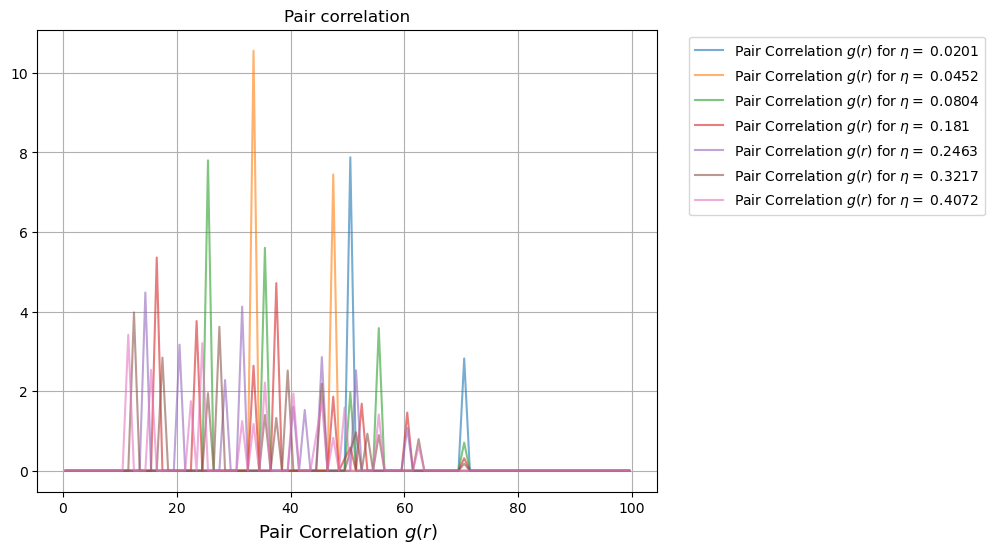

In [12]:
N = np.asarray([4, 9, 16, 36, 49, 64, 81])
q = 2.5
sigma = 4
L = 100
eta = N*np.pi*sigma**2/L**2
i=0

fig, ax = plt.subplots(1,1, figsize=(8,6))
for n in N:
    model = HardDisks(n, q, L, sigma, initial_conf='rectangular')
    r, g_r = model.pair_correlation(r_max=L)
    ax.plot(r, g_r, label='Pair Correlation $g(r)$ for $\eta =$ '+str(round(eta[i], 4)), alpha=0.6)
    i+= 1
    

ax.set_xlabel('Distance $r$', fontsize=13)
ax.set_xlabel('Pair Correlation $g(r)$', fontsize=13)
ax.set_title('Pair correlation')
ax.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
ax.grid()
fig.savefig('Plots/ex12_pair_correlation.png', dpi=300, bbox_inches="tight")